In [492]:
# import basic libraries
import yt
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10
from astropy import units as u

# import halo catalogue func
from yt.analysis_modules.halo_analysis.api import *

# load halo dataset
halos_ds = yt.load('./LG4_2048_40pc/rd0070/halo_catalogs/catalog/catalog0070_thres180.0.h5')

yt : [INFO     ] 2017-06-27 13:38:46,379 Parameters: current_time              = 3.75573046409e+16
yt : [INFO     ] 2017-06-27 13:38:46,382 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-06-27 13:38:46,385 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-27 13:38:46,389 Parameters: domain_right_edge         = [  2.22535525e+25   2.22535525e+25   2.22535525e+25]
yt : [INFO     ] 2017-06-27 13:38:46,392 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-27 13:38:46,394 Parameters: current_redshift          = 4.99999998323
yt : [INFO     ] 2017-06-27 13:38:46,396 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-06-27 13:38:46,398 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-06-27 13:38:46,400 Parameters: hubble_constant           = 0.6933


In [10]:
import tempfile
import shutil
import os

# Create temporary directory for storing files
tmpdir = tempfile.mkdtemp()

In [493]:
# Instantiate a catalog using those two paramter files
hc = HaloCatalog(halos_ds=halos_ds, output_dir=os.path.join(tmpdir, 'halo_catalog'))
hc.load()

yt : [INFO     ] 2017-06-27 13:38:50,187 Allocating for 8.970e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-06-27 13:38:50,195 Identified 3.065e+03 octs


In [494]:
# specify boundaries of zoom-in box
# scaling factor multiplied by info from text file 
# units in cm
xmin = 2.22535525e+25*0.39319589 * u.cm
ymin = 2.22535525e+25*0.42984636 * u.cm
zmin = 2.22535525e+25*0.41706725 * u.cm

xmax = 2.22535525e+25*0.56298484 * u.cm
ymax = 2.22535525e+25*0.55089246 * u.cm
zmax = 2.22535525e+25*0.56698254 * u.cm

In [495]:
# find masses of halos
masslist = []

for halo in hc.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        masslist.append(mass.value)


In [496]:
masslist = np.array(masslist)

In [497]:
bins = np.geomspace(start=1e6, stop=1e11, num=50)

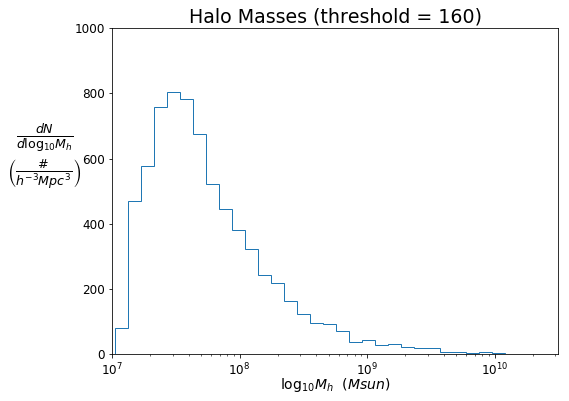

In [498]:
# create histogram
plt.figure(figsize=(8,6))
plt.hist(masslist, bins, histtype='step', fill = False)
plt.title("Halo Masses (threshold = 160)", size = 19)
plt.axis([1e7, 10**10.5, 0, 1000])


# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= -2)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 30)

# create axis ticks 
plt.xscale('log')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

#show and save
plt.show()

#plt.savefig('./LG4_2048_40pc/rd0070/graph2.png', dpi = 300)

In [499]:
log_mass = np.log(masslist) / log(10)
density, bin_edges = np.histogram(log_mass, bins= np.linspace(7, 10, 30))
log_density = np.log(density) / log(10)

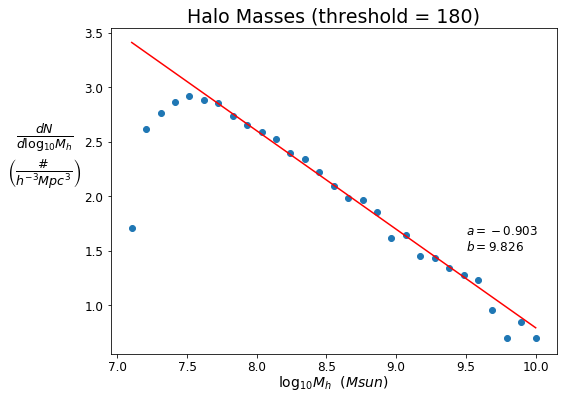

In [501]:
# specify figure size
plt.figure(figsize=(8,6))

#determine line of best fit
bin_edges_fit = bin_edges[6:-4]
log_density_fit = log_density[5:-4]
par = np.polyfit(bin_edges_fit, log_density_fit, 1, full=True)
slope, intercept = par[0][0], par[0][1]

# plot data and line
bin_edges_red = bin_edges[1::]
plt.scatter(bin_edges_red, log_density)
plt.plot(bin_edges_red, slope * bin_edges_red + intercept, color = 'red')
plt.title("Halo Masses (threshold = 180)", size = 19)

# create axis labels
xlab = "$\log_{10}M_h}$  $(Msun)$"
ylab = r"$\frac{dN}{d\log_{10}M_h}$"+"\n"+r"$\left(\frac{\#}{h^{-3}Mpc^3}\right)$"
plt.xlabel(xlab, size = 14, labelpad= 0)
plt.ylabel(ylab, rotation = 0, size = 18, labelpad= 40)

# create axis ticks 
plt.yscale('linear')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)

# add slope and intercept
annotation = "$a = {:1.3f}$ \n$b = {:1.3f}$".format(slope, intercept)
"a = " + str(slope) + " b = " + str(intercept)
plt.text(9.5, 1.5, annotation, size = 12)

#show and save
plt.show()


In [ ]:
#--find ratio of stellar mass to halo mass
ratiolist = []

# dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

for halo in hc.halo_list:
    # find coord and mass of halo
    x = halo.quantities.get('particle_position_x') * u.cm
    y = halo.quantities.get('particle_position_y') * u.cm
    z = halo.quantities.get('particle_position_z') * u.cm
    halo_mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun
    
    # check if halo is inside zoom-in box
    if xmin <= x < xmax and ymin <= y < ymax and zmin <= z < zmax:
        # create a sphere data object with halo position and radius
        radius = halo.quantities.get('virial_radius') * u.cm
        sp = ds.sphere([x.value/2.22535525e+25, y.value/2.22535525e+25, z.value/2.22535525e+25],
                        (radius.value, 'cm'))
        
        

In [487]:
# dataset
ds = yt.load('~/../../tigress/cen/LG4_2048_40pc/RD0070/redshift0070')

halo = hc.halo_list[18]
# find coord and mass of halo
x = halo.quantities.get('particle_position_x') * u.cm
y = halo.quantities.get('particle_position_y') * u.cm
z = halo.quantities.get('particle_position_z') * u.cm
halo_mass = halo.quantities.get('particle_mass').in_units('Msun') * u.Msun

# find stellar mass
radius = halo.quantities.get('virial_radius') * u.cm
sp = ds.sphere([x.value/2.22535525e+25, y.value/2.22535525e+25, z.value/2.22535525e+25],
                (radius.value, 'cm'))

# from below (just for test purposes)
stellar_mass = sp.quantities.total_mass() * u.g
stellar_mass = stellar_mass.to('Msun')
ratio = (stellar_mass) / halo_mass 
ratiolist.append(ratio)


yt : [INFO     ] 2017-06-27 11:04:09,469 Parameters: current_time              = 158.01757996843
yt : [INFO     ] 2017-06-27 11:04:09,473 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2017-06-27 11:04:09,476 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-06-27 11:04:09,479 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-06-27 11:04:09,483 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-06-27 11:04:09,485 Parameters: current_redshift          = 4.9999999832278
yt : [INFO     ] 2017-06-27 11:04:09,487 Parameters: omega_lambda              = 0.712
yt : [INFO     ] 2017-06-27 11:04:09,490 Parameters: omega_matter              = 0.288
yt : [INFO     ] 2017-06-27 11:04:09,492 Parameters: hubble_constant           = 0.6933
Parsing Hierarchy : 100%|██████████| 44216/44216 [00:04<00:00, 10399.28it/s]
yt : [INFO     ] 2017-06-27 11:04:17,017 Gathering a field list (this may take a moment.)


In [338]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'initial_mass'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('all', 'typeia_fraction'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'H2II_Density'),
 ('enzo', 'H2I_Density'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HM_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'Temperature'),
 ('enzo', 'TotalEnergy'),
 ('enzo', 'x-velocity'),
 ('enzo', 'y-velocity'),
 ('enzo', 'z-velocity'),
 ('io', 'creation_time'),
 ('io', 'dynamical_time'),
 ('io', 'initial_mass'),
 ('io', 'metallicity_fraction'),
 ('io', 'part

In [465]:
halo_mass

<Quantity 10910299.154122373 solMass>

In [417]:
x,y,z

(<Quantity 1.2576035739426941e+25 cm>,
 <Quantity 9.17065987874833e+24 cm>,
 <Quantity 1.0358700479584046e+25 cm>)

In [470]:
stellar_mass = sp.quantities.total_mass() * u.g

In [391]:
#stellar_mass = stellar_mass.to('Msun')

In [481]:
stellar_mass

<Quantity [    25761.58060851, 15147981.4121696 ] solMass>

In [488]:
ratio

<Quantity [ 0.00574234, 1.10242444]>

In [489]:
print(ratiolist)

[<Quantity 3.0111384817726794e-49>, <Quantity 1.6595203629419832e-49>, <Quantity 1.0274242792664465>, <Quantity [ 0.00433863, 1.02742428]>, <Quantity [ 0.00223694, 1.31533692]>, <Quantity [ 0.00574234, 1.10242444]>]


In [490]:
temp1 = sp.quantities.total_quantity([('io', 'particle_mass')]).in_units('g') * u.g
temp1 = temp1.to('Msun')

temp2 = sp.quantities.total_quantity([('all', 'particle_mass')]).in_units('g') * u.g
temp2 = temp2.to('Msun')

print(temp1/temp2)

1.0000000000000002


In [491]:
temp1 / halo_mass

<Quantity 1.1024244350401273>